# Analysis of Paper IC of sm,smi, smo

First we will calculate molecular descriptor of SMI SMO SM

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rawcorrelation.csv')

In [3]:
df

,Unnamed: 0,CM_SK_37,CM_SK_4,CM_Ve_37,CM_Ve_4,Papp_SK,Papp_Ve,MW,logD7.4,logP,logkp,PSA,pKa,logS,Donors,Acceptors,Rotatable
0,sesamol,0.013680,0.009350,0.012759,0.005388,0.07,0.10,138.12,1.29,1.29,-6.27,38.7,9.79,-1.55,1,3,0
1,sesamin,0.495888,0.343954,0.094952,0.211082,0.15,0.10,354.35,2.45,2.45,-6.56,55.4,0.00,-4.60,0,6,2
2,sesamolin,1.790225,1.553643,0.248770,0.187070,0.33,0.17,370.35,2.74,2.74,-6.44,64.6,0.00,-4.33,0,7,3


In [4]:
df2 = df.drop(columns=['Unnamed: 0'])

In [5]:
df2

,CM_SK_37,CM_SK_4,CM_Ve_37,CM_Ve_4,Papp_SK,Papp_Ve,MW,logD7.4,logP,logkp,PSA,pKa,logS,Donors,Acceptors,Rotatable
0,0.013680,0.009350,0.012759,0.005388,0.07,0.10,138.12,1.29,1.29,-6.27,38.7,9.79,-1.55,1,3,0
1,0.495888,0.343954,0.094952,0.211082,0.15,0.10,354.35,2.45,2.45,-6.56,55.4,0.00,-4.60,0,6,2
2,1.790225,1.553643,0.248770,0.187070,0.33,0.17,370.35,2.74,2.74,-6.44,64.6,0.00,-4.33,0,7,3


In [6]:
from scipy.stats import pearsonr
rho = df2.corr()
pval = df2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
Res_pearson_sig = rho.round(3).astype(str) + p
Res_pearson_sig.to_csv('Res_pearson_sig.csv')
Res_pearson_sig

,CM_SK_37,CM_SK_4,CM_Ve_37,CM_Ve_4,Papp_SK,Papp_Ve,MW,logD7.4,logP,logkp,PSA,pKa,logS,Donors,Acceptors,Rotatable
CM_SK_37,1.0***,0.998*,0.996,0.631,0.999*,0.965,0.752,0.83,0.83,-0.357,0.912,-0.71,-0.651,-0.71,0.858,0.901
CM_SK_4,0.998*,1.0***,0.99,0.584,0.995,0.979,0.712,0.796,0.796,-0.302,0.886,-0.668,-0.606,-0.668,0.827,0.875
CM_Ve_37,0.996,0.99,1.0***,0.694,0.999*,0.939,0.805,0.874,0.874,-0.434,0.943,-0.767,-0.713,-0.767,0.898,0.935
CM_Ve_4,0.631,0.584,0.694,1.0***,0.661,0.405,0.986,0.956,0.956,-0.95,0.894,-0.994,-1.0*,-0.994,0.94,0.905
Papp_SK,0.999*,0.995,0.999*,0.661,1.0***,0.954,0.777,0.851,0.851,-0.393,0.927,-0.737,-0.681,-0.737,0.878,0.918
Papp_Ve,0.965,0.979,0.939,0.405,0.954,1.0***,0.552,0.655,0.655,-0.099,0.772,-0.5,-0.429,-0.5,0.693,0.756
MW,0.752,0.712,0.805,0.986,0.777,0.552,1.0***,0.992,0.992,-0.884,0.956,-0.998*,-0.99,-0.998*,0.984,0.963
logD7.4,0.83,0.796,0.874,0.956,0.851,0.655,0.992,1.0***,1.0***,-0.817,0.986,-0.982,-0.964,-0.982,0.999*,0.99
logP,0.83,0.796,0.874,0.956,0.851,0.655,0.992,1.0***,1.0***,-0.817,0.986,-0.982,-0.964,-0.982,0.999*,0.99
logkp,-0.357,-0.302,-0.434,-0.95,-0.393,-0.099,-0.884,-0.817,-0.817,1.0***,-0.709,0.911,0.941,0.911,-0.786,-0.726


In [7]:
pval

,CM_SK_37,CM_SK_4,CM_Ve_37,CM_Ve_4,Papp_SK,Papp_Ve,MW,logD7.4,logP,logkp,PSA,pKa,logS,Donors,Acceptors,Rotatable
CM_SK_37,0.000000,0.037012,0.053853,0.565698,0.025168,0.169056,0.458320,3.765725e-01,3.765725e-01,0.767780,0.269736,0.497610,0.548568,0.497610,0.343189,0.285315
CM_SK_4,0.037012,0.000000,0.090865,0.602711,0.062180,0.132044,0.495332,4.135847e-01,4.135847e-01,0.804793,0.306748,0.534622,0.585580,0.534622,0.380201,0.322327
CM_Ve_37,0.053853,0.090865,0.000000,0.511845,0.028685,0.222909,0.404467,3.227196e-01,3.227196e-01,0.713928,0.215883,0.443757,0.494715,0.443757,0.289336,0.231462
CM_Ve_4,0.565698,0.602711,0.511845,0.000000,0.540531,0.734755,0.107378,1.891258e-01,1.891258e-01,0.202082,0.295963,0.068088,0.017131,0.068088,0.222509,0.280384
Papp_SK,0.025168,0.062180,0.028685,0.540531,0.000000,0.194224,0.433152,3.514048e-01,3.514048e-01,0.742613,0.244568,0.472443,0.523400,0.472443,0.318022,0.260147
Papp_Ve,0.169056,0.132044,0.222909,0.734755,0.194224,0.000000,0.627376,5.456289e-01,5.456289e-01,0.936837,0.438792,0.666667,0.717624,0.666667,0.512246,0.454371
MW,0.458320,0.495332,0.404467,0.107378,0.433152,0.627376,0.000000,8.174744e-02,8.174744e-02,0.309461,0.188584,0.039290,0.090248,0.039290,0.115131,0.173005
logD7.4,0.376573,0.413585,0.322720,0.189126,0.351405,0.545629,0.081747,0.000000e+00,1.341576e-08,0.391208,0.106837,0.121038,0.171995,0.121038,0.033383,0.091258
logP,0.376573,0.413585,0.322720,0.189126,0.351405,0.545629,0.081747,1.341576e-08,0.000000e+00,0.391208,0.106837,0.121038,0.171995,0.121038,0.033383,0.091258
logkp,0.767780,0.804793,0.713928,0.202082,0.742613,0.936837,0.309461,3.912080e-01,3.912080e-01,0.000000,0.498045,0.270170,0.219213,0.270170,0.424591,0.482466


In [8]:
Res_pearson = df2.corr(method='pearson').round(3)
Res_pearson.to_csv('Res_pearson.csv')
Res_pearson

,CM_SK_37,CM_SK_4,CM_Ve_37,CM_Ve_4,Papp_SK,Papp_Ve,MW,logD7.4,logP,logkp,PSA,pKa,logS,Donors,Acceptors,Rotatable
CM_SK_37,1.000,0.998,0.996,0.631,0.999,0.965,0.752,0.830,0.830,-0.357,0.912,-0.710,-0.651,-0.710,0.858,0.901
CM_SK_4,0.998,1.000,0.990,0.584,0.995,0.979,0.712,0.796,0.796,-0.302,0.886,-0.668,-0.606,-0.668,0.827,0.875
CM_Ve_37,0.996,0.990,1.000,0.694,0.999,0.939,0.805,0.874,0.874,-0.434,0.943,-0.767,-0.713,-0.767,0.898,0.935
CM_Ve_4,0.631,0.584,0.694,1.000,0.661,0.405,0.986,0.956,0.956,-0.950,0.894,-0.994,-1.000,-0.994,0.940,0.905
Papp_SK,0.999,0.995,0.999,0.661,1.000,0.954,0.777,0.851,0.851,-0.393,0.927,-0.737,-0.681,-0.737,0.878,0.918
Papp_Ve,0.965,0.979,0.939,0.405,0.954,1.000,0.552,0.655,0.655,-0.099,0.772,-0.500,-0.429,-0.500,0.693,0.756
MW,0.752,0.712,0.805,0.986,0.777,0.552,1.000,0.992,0.992,-0.884,0.956,-0.998,-0.990,-0.998,0.984,0.963
logD7.4,0.830,0.796,0.874,0.956,0.851,0.655,0.992,1.000,1.000,-0.817,0.986,-0.982,-0.964,-0.982,0.999,0.990
logP,0.830,0.796,0.874,0.956,0.851,0.655,0.992,1.000,1.000,-0.817,0.986,-0.982,-0.964,-0.982,0.999,0.990
logkp,-0.357,-0.302,-0.434,-0.950,-0.393,-0.099,-0.884,-0.817,-0.817,1.000,-0.709,0.911,0.941,0.911,-0.786,-0.726


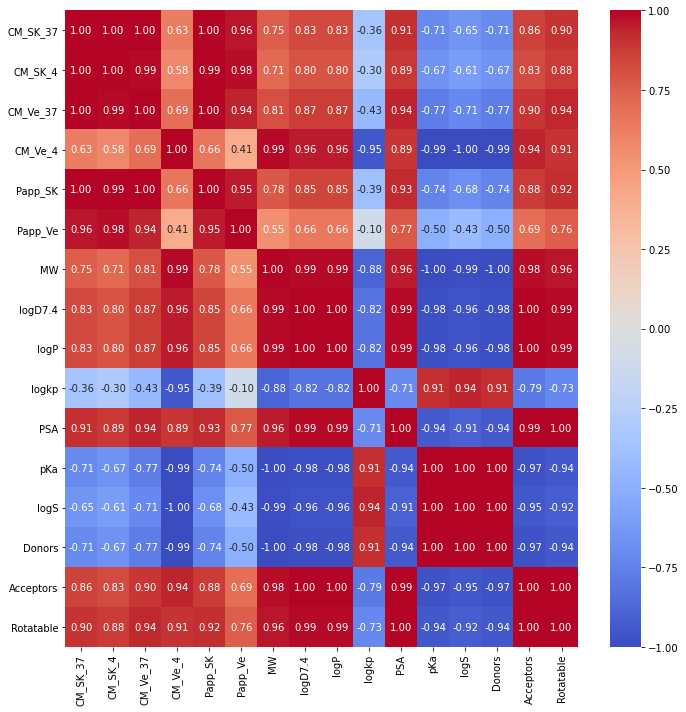

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson_number.pdf', dpi=300)

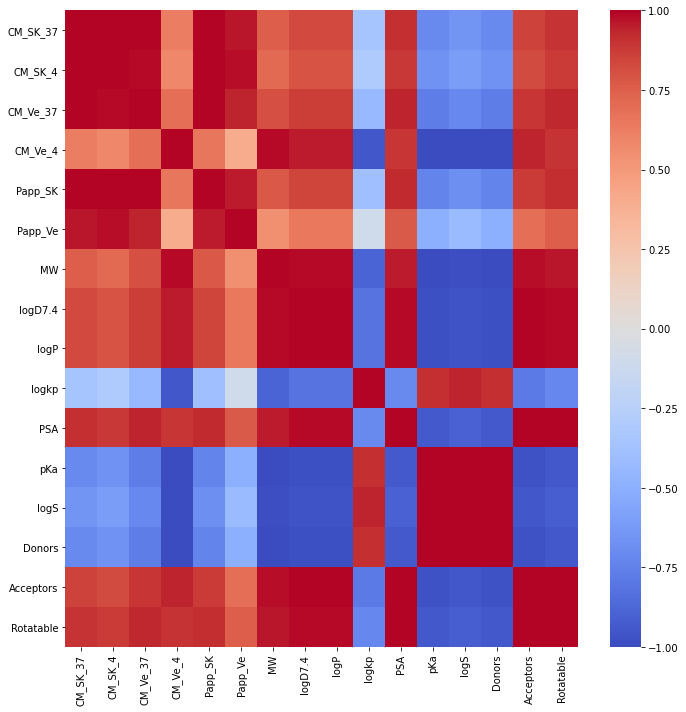

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=False, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson.pdf', dpi=300)

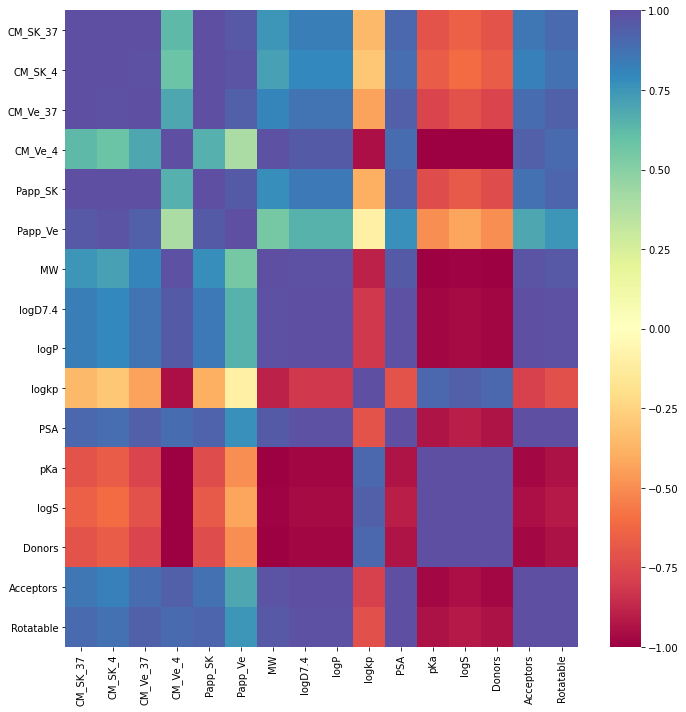

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=False, cmap='Spectral', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson_spectral.pdf', dpi=600)

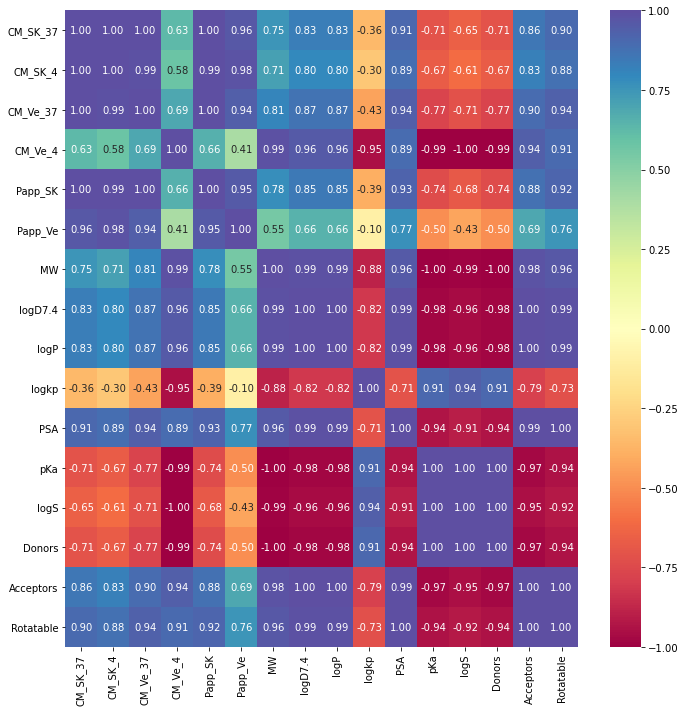

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=True, cmap='Spectral', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson_spectral_number.pdf', dpi=600)